In [1]:
# -*-* codig: utf-8 -*-
# @author: tongzi
# @description: Data Cleanning and Preparation
# @created date: 2019/07/04
# @license

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


#### In this chapter, we will discuss tools for missing data, duplicate data, string manipulation, and some other analytical data transformations.####

### Handling Missing Data

Missing data occurs commonly in many data analysis applications. One of the goal of pandas is to make working with missing data as painless as possible. For example, all of the descriptive statistic on pandas objects exclude missing data by default.  
For numeric data, pandas uses the float-point value **NaN** (Not a Number) to represent missing data. We call this a sentinel value that can be easily detected:

In [3]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [4]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [5]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

Below is a table that lists some functions related to missing data handling:  
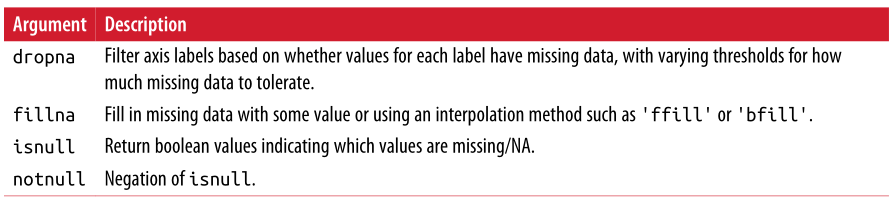

### Filtering Out Missing Data 

In [6]:
from numpy import nan as NA

In [7]:
data = pd.Series([1, NA, 3.5, 7])

In [8]:
data.dropna()

0    1.0
2    3.5
3    7.0
dtype: float64

As we can see above, the *dropna*() method returns the Series with only the non-null data and index values. This is equivalent to:

In [9]:
data[data.notnull()]

0    1.0
2    3.5
3    7.0
dtype: float64

With DataFrame, things are a bit more different, we may want to drop rows or columns that are all NA or only those containing any NAs. *dropna*() method by default drops any row containing a missing value:

In [10]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
....: [NA, NA, NA], [NA, 6.5, 3.]])

In [11]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [12]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


>从上述的例子可以看出，对于DataFrame，*dropna*()默认会将至少包含一个缺失值的行删除掉。

In [15]:
# 因为每一列都至少包含一个缺失值，所以全部删除
data.dropna(axis='columns')

""
0
1
2
3


In [16]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


Passing *how*='all', will only drop rows that are all NA:

In [17]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [18]:
# 增加一列
data[4] = NA

In [19]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [20]:
data.dropna(axis='columns', how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


另外一个过滤DataFrame中行数据的主题是关于时间序列的，假设我们只想保留一定数量的观测值，可以通过指定*thresh*参数：

In [21]:
df = pd.DataFrame(np.random.randn(7, 3))

In [22]:
df

,0,1,2
0,-0.377788,-0.099363,0.773704
1,-0.807716,-0.697565,0.309078
2,-1.002575,-0.002337,0.970096
3,1.768859,-0.646667,0.167954
4,0.687819,3.742656,-0.482712
5,-0.035491,0.267234,1.161451
6,-0.654256,-0.612303,2.564999


In [23]:
# 将前4行，第1列置为NaN
df.iloc[:4, 1] = NA

In [26]:
# 将前2行，第2列置为NaN
df.iloc[:2, 2] = NA

In [27]:
df

,0,1,2
0,-0.377788,NaN,NaN
1,-0.807716,NaN,NaN
2,-1.002575,NaN,0.970096
3,1.768859,NaN,0.167954
4,0.687819,3.742656,-0.482712
5,-0.035491,0.267234,1.161451
6,-0.654256,-0.612303,2.564999


In [28]:
# 这样调用会删除所有包含缺失值（NaN）的行
df.dropna()

,0,1,2
4,0.687819,3.742656,-0.482712
5,-0.035491,0.267234,1.161451
6,-0.654256,-0.612303,2.564999


In [29]:
# 通过指定thresh参数，可以指定只删除
# 一定数量的包含缺失值的行
df.dropna(thresh=2)

,0,1,2
2,-1.002575,NaN,0.970096
3,1.768859,NaN,0.167954
4,0.687819,3.742656,-0.482712
5,-0.035491,0.267234,1.161451
6,-0.654256,-0.612303,2.564999


### Filling In Missing Data

Rather than filtering out missing data (potentially discarding other data along with it), we may want to fill in the 'hole' in any number of ways. For most purposes, the *fillna*() method is the workhorse function to use:

In [30]:
# 用0填充所有列的缺失值
df.fillna(0)

,0,1,2
0,-0.377788,0.000000,0.000000
1,-0.807716,0.000000,0.000000
2,-1.002575,0.000000,0.970096
3,1.768859,0.000000,0.167954
4,0.687819,3.742656,-0.482712
5,-0.035491,0.267234,1.161451
6,-0.654256,-0.612303,2.564999


In [32]:
# 为每一个列指定填充值
# 第1列用10填充，第2列用200填充
df.fillna({1:10, 2:200})

,0,1,2
0,-0.377788,10.000000,200.000000
1,-0.807716,10.000000,200.000000
2,-1.002575,10.000000,0.970096
3,1.768859,10.000000,0.167954
4,0.687819,3.742656,-0.482712
5,-0.035491,0.267234,1.161451
6,-0.654256,-0.612303,2.564999


*fillna*() returns a new object, but we can modify the existing object in-place by passing the argument *inplace*:

In [33]:
df.fillna(0, inplace=True)

In [34]:
df

,0,1,2
0,-0.377788,0.000000,0.000000
1,-0.807716,0.000000,0.000000
2,-1.002575,0.000000,0.970096
3,1.768859,0.000000,0.167954
4,0.687819,3.742656,-0.482712
5,-0.035491,0.267234,1.161451
6,-0.654256,-0.612303,2.564999


The same interpolations available for reindexing can be used for *fillna*():
>在重索引中使用的插值方式也可以用于*fillna*()方法中。

In [35]:
df = pd.DataFrame(np.random.randn(6, 3))

In [36]:
# 隐式索引（implicite indexing）
df.iloc[2:, 1] = NA # 第2行之后，第1列置为NaN

In [39]:
# 隐式索引（implicite indexing）
df.iloc[4:, 2] = NA # 第4行之后，第2列置为NaN

In [40]:
df

,0,1,2
0,-0.018569,0.250788,0.468610
1,-1.147574,1.921718,1.831329
2,-1.351726,NaN,-0.247973
3,0.824898,NaN,0.608928
4,-0.540984,NaN,NaN
5,-0.748586,NaN,NaN


In [41]:
# 'ffill'表示forward fill,用缺失值前面的数填充它自己
df.fillna(method='ffill') 

,0,1,2
0,-0.018569,0.250788,0.468610
1,-1.147574,1.921718,1.831329
2,-1.351726,1.921718,-0.247973
3,0.824898,1.921718,0.608928
4,-0.540984,1.921718,0.608928
5,-0.748586,1.921718,0.608928


In [42]:
# 'ffill'表示forward fill,用缺失值前面的数填充它自己,并
# 且向后填充的连续个缺失值限制为2个
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.018569,0.250788,0.468610
1,-1.147574,1.921718,1.831329
2,-1.351726,1.921718,-0.247973
3,0.824898,1.921718,0.608928
4,-0.540984,NaN,0.608928
5,-0.748586,NaN,0.608928


With the *fillna*(), we can do lots of things with a little creativity. For example, we might pass the mean or median value of a Series:

In [43]:
data = pd.Series([1., NA, 3.5, NA, 7])

In [44]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [45]:
#用均值(1.0 + 3.5 + 7.0) / 3填充
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

In [48]:
(1.0 + 3.5 + 7.0) / 3

3.8333333333333335

*fillna*()方法的参数说明：  
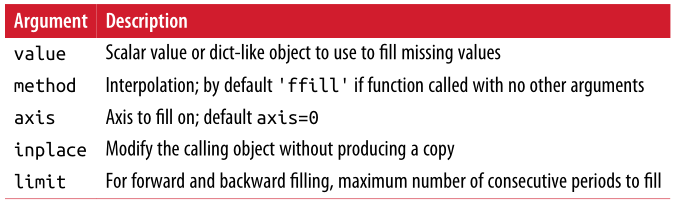

### Data Transformation 

So far in this chapter, we've been concerned with rearranging data. Filtering, cleaning and other transformations are another class of important operations.

#### Remobing Duplicates 

Duplicate row may be found in a DataFrame for any number of reasons. For example:

In [49]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
....: 'k2': [1, 1, 2, 3, 3, 4, 4]})

In [50]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


The DataFrame method *duplicated*() returns a Series indicating whether each row is a dulicate (has been observed in a previous row) or not:

In [51]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

Relately, the DataFrame *drop_duplicates*() returns a DataFrame where the duplicated array is False:

In [52]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


上述的方法进行相关操作时默认考虑了所有的列；但是我们可以只指定部分的列以探测重复值，举个例子：

In [53]:
data['v1'] = range(7)

In [54]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [56]:
# 只对k1列除去重复值
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


*duplicated*()和*drop_duplicates*()默认保留第一个找到的重复值，通过传入参数*keep*='last'，将会保留最后一个：

In [57]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


#### Transformationg Data Using a Function or Mapping 

对于很对数据集，我们可能想对数组，Series或者DataFrame中的行进行一些转换。举个例子：

In [58]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
....: 'Pastrami', 'corned beef', 'Bacon',
....: 'pastrami', 'honey ham', 'nova lox'],
....: 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [59]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


假设我们想增加一列用于指定哪些肉来自于哪种类型的动物：
>Suppose we want to add a column indicating the type of the animal that each food came from.

In [60]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

The *map*() method on a Series accepts a function or dict-like containing a mapping, but here we have a problem in that some of the meats are capitalized and others are not. Thus, we need to convert each value to lowercase using the *Series.str.lower*() method:

In [61]:
lowercased = data['food'].str.lower()

In [62]:
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [63]:
# 增加一列animal
data['animal'] = lowercased.map(meat_to_animal)

In [64]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


We could also pass a function that does the same work:

In [67]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

Using *map*() method is a convenient way to perform element-wise transformation and other related data cleaning-related operations.

#### Replacing Values

使用*fillna*()方法填充缺失值是多数值替换下的一个特殊情况。正如上述我们看到的一样，*map*()方法可以用来修改一个对象中的部分值但是*replace*()方法提供一种简单的且更加灵活的方法来进行替换。Let's consider this Series:

In [69]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])

In [70]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

假设我们认为-999.0是一个异常值，但是我们需要将这个值修改为pandas所认识的异常值（缺失值），我们可以使用*replace*()方法，它将会返回一个新的对象除非指定参数: inplace=True.

In [71]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

If we want to replace multile values at once, we instead pass a list and then the substitute value (替代值):

In [72]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

To use a different replacement for each value, pass a list of substitute:

In [74]:
# -999用np.nan替换
# -1000用0替换
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

The argument passed can also be a dict:

In [75]:
data.replace({-999: np.nan, -1000:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

>The *data.replace*() is distinct from *data.str.replace*(), which performs string substitute element-wise.

#### Renaming Axis Indexes 

类似Series和DataFrame中的值一样，它们的标签值也是可以修改的，举个例子：

In [76]:
 data = pd.DataFrame(np.arange(12).reshape((3, 4)),
....: index=['Ohio', 'Colorado', 'New York'],
....: columns=['one', 'two', 'three', 'four'])

In [77]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


想Series一样，轴的标签也有一个*map*()方法：

In [79]:
# 将所有行标签值全部大写
data.index.map(lambda x: x.upper())

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

替换原来的行标签：

In [81]:
data.index = data.index.map(lambda x: x.upper())

In [82]:
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


If we want to create a transformed version of dataset without modifying the original, a useful method is *rename*():

In [85]:
# 行标签首字母大写
# 列标签全部大写
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


*rename*()可以用来重命名标签（行标签和列标签）：

In [88]:
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [89]:
data.rename(index={'NEW YORK': 'Nanning'},
           columns={'four': 4})

,one,two,three,4
OHIO,0,1,2,3
COLORADO,4,5,6,7
Nanning,8,9,10,11


*rename*() method saves us from the chore (家庭杂事，累人的事) of copying the DataFrame manually and assigning to its index and columns attributes. By passing the argument *inplace*, we can modify a dataset in-place:

In [90]:
data.rename(index={'OHIO':'Liuzhou'}, inplace=True)

In [91]:
data

,one,two,three,four
Liuzhou,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


#### Discretization and Binning
离散化和装箱

Continuous data is discretized or otherwise separated into "bins" for analysis. Suppose we have data about a group of people in a study, and we want to group them into discrete age buckets (桶):

In [92]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Let's divide these into bins of 18 to 25, 26 to 35, 36 to 60, and finally 61 and older. To do so, we have to use *cut*(), a method in pandas:

In [93]:
bins = [18, 25 ,35, 60, 100]

In [94]:
cats = pd.cut(ages, bins)

In [95]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

The object pandas returns is a special Categorical object. The object's *codes* attribute contains a categories array specifying the distinct category names along with a labeling for the *ages* data:

In [97]:
# 因为有四个区间，所以这里分成了4类：0,1,2,3,4
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [99]:
# 每一个类别的划分
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

使用*pandas.value_counts*()方法计算每一个类别的人数：

In [100]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

Consistent with mathematical notation for intervals (，区间，间隔), a parenthesis means that the side is open, while the square bracket mean it is closed (inclusive). We can change which side is closed by passing *right*=False:

In [101]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

We can also pass our own bin names by passing a list or an array to the *labels* option:

In [102]:
group_names = ["Youth", "YoungAdult", "MiddleAged", "Senior"]

In [103]:
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

If we pass an integer number of bins to the *cut*() method instead of explicit edges, it will compute the equal-length bins  based on the miminum and maximum values in the data. Consider the case of some uniformly distributed data chopped into fourths:

In [104]:
data = np.random.rand(20)

In [106]:
# 根据data中的最大值和最小值分成4个区间（也叫bins，桶）
# 保留2位小数
pd.cut(data, 4, precision=2)

[(0.0023, 0.25], (0.49, 0.74], (0.0023, 0.25], (0.0023, 0.25], (0.0023, 0.25], ..., (0.49, 0.74], (0.25, 0.49], (0.49, 0.74], (0.49, 0.74], (0.74, 0.99]]
Length: 20
Categories (4, interval[float64]): [(0.0023, 0.25] < (0.25, 0.49] < (0.49, 0.74] < (0.74, 0.99]]

The *precision*=2 option limits the decimal precision to two digits.

A closely related function, *qcut*(), bins the data on sample quantiles. Depending on the distribution of the data, using *cut*() method will not usually result in each bin having same number of data point. Since *qcut*() uses sample quantiles instead, by definition you will obtain roughly equal-size bins: 

In [107]:
data = np.random.randn(1000) # normal distribution

In [116]:
cats = pd.qcut(data, 4) # cut into quartile

In [117]:
cats

[(-0.00142, 0.631], (-3.009, -0.611], (-0.611, -0.00142], (-0.611, -0.00142], (-0.00142, 0.631], ..., (-3.009, -0.611], (-3.009, -0.611], (-3.009, -0.611], (-0.00142, 0.631], (-0.00142, 0.631]]
Length: 1000
Categories (4, interval[float64]): [(-3.009, -0.611] < (-0.611, -0.00142] < (-0.00142, 0.631] < (0.631, 3.77]]

In [118]:
pd.value_counts(cats)

(0.631, 3.77]         250
(-0.00142, 0.631]     250
(-0.611, -0.00142]    250
(-3.009, -0.611]      250
dtype: int64

Similar to *cut*(), we can pass our own quantiles (numbers between 0 and 1, inclusive):

In [119]:
pd.qcut(data, [0, 0.1, 0.5, 0.6, 0.9, 1.])

[(-0.00142, 0.215], (-3.009, -1.253], (-1.253, -0.00142], (-1.253, -0.00142], (-0.00142, 0.215], ..., (-1.253, -0.00142], (-3.009, -1.253], (-1.253, -0.00142], (0.215, 1.25], (-0.00142, 0.215]]
Length: 1000
Categories (5, interval[float64]): [(-3.009, -1.253] < (-1.253, -0.00142] < (-0.00142, 0.215] < (0.215, 1.25] < (1.25, 3.77]]

#### Detecting and Filtering Outliers (异常值)

过滤或者转换异常值是应用数组操作的一键大事，举个例子：

In [120]:
data = pd.DataFrame(np.random.randn(1000, 4))

In [121]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.062161,0.010908,-0.012074,0.010671
std,0.994697,1.007757,0.964354,0.999827
min,-3.299686,-2.952604,-3.579078,-3.577651
25%,-0.620926,-0.645775,-0.700070,-0.668896
50%,0.014344,-0.017357,0.012803,0.038414
75%,0.764888,0.677508,0.626660,0.709005
max,3.192125,3.342354,3.205287,2.542400


Suppose we want to find values in one of the columns exceding 3 in absolute value:

In [122]:
col = data[2]

In [123]:
col[np.abs(col) > 3]

189    3.109010
389   -3.579078
824    3.205287
Name: 2, dtype: float64

从所有的行中选择至少有一个数值的绝对值大于3的数据出来，可以在一个布尔值DataFrame使用上*any*()方法进行选择：

In [124]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
189,-0.513485,0.464559,3.109010,0.958465
389,-0.377858,0.341131,-3.579078,-0.906682
450,0.516619,0.099933,-0.835361,-3.163249
599,-2.139750,1.593949,1.175514,-3.435382
638,-1.383712,3.318922,-0.770849,-2.257575
668,-0.805004,0.233830,0.284846,-3.577651
735,-3.299686,0.157850,1.325712,-0.321169
824,0.266576,2.287888,3.205287,1.195037
844,-0.756320,3.342354,-2.250097,-1.664915
852,3.192125,-0.897974,0.696980,0.707895


将[-3, 3]之外的数据都乘以3：

In [125]:
data[np.abs(data) > 3] = np.sign(data) * 3

In [126]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.062269,0.010246,-0.011809,0.011901
std,0.993141,1.005683,0.961369,0.995834
min,-3.000000,-2.952604,-3.000000,-3.000000
25%,-0.620926,-0.645775,-0.700070,-0.668896
50%,0.014344,-0.017357,0.012803,0.038414
75%,0.764888,0.677508,0.626660,0.709005
max,3.000000,3.000000,3.000000,2.542400


In [130]:
test = np.random.randint(-10, 10, size=(3,3))

In [136]:
test = pd.DataFrame(test)

In [137]:
test

,0,1,2
0,-8,-2,-9
1,-4,7,-3
2,0,8,-8


In [139]:
test[np.abs(test) > 3] = np.sign(test) * 3

In [140]:
test

,0,1,2
0,-3,-2,-3
1,-3,3,-3
2,0,3,-3


In [141]:
np.sign(test) * 3

,0,1,2
0,-3,-3,-3
1,-3,3,-3
2,0,3,-3


*np.sign*(data)根据实参数data各个元素的符号翻译-1和1的数组，数组的大小(shape)和data一样。

#### Permutation and Random Sampling

Permuting (randomly reordering) a Series or the rows of a DataFrame is easy to do using the *numpy.random.permutation*(). Calling *permutation*() with the length of the axis you want to permuate produces an array of integers indicating the new ordering:

In [142]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))

In [143]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [146]:
sampler = np.random.permutation(5)

In [147]:
sampler

array([3, 2, 0, 1, 4])

The array can be used in iloc-based indexing or the equivalent function *take*() function:

In [148]:
df.iloc[sampler]

,0,1,2,3
3,12,13,14,15
2,8,9,10,11
0,0,1,2,3
1,4,5,6,7
4,16,17,18,19


In [149]:
df.take(sampler)

,0,1,2,3
3,12,13,14,15
2,8,9,10,11
0,0,1,2,3
1,4,5,6,7
4,16,17,18,19


To select a random subset without replacement, we can use the *sample*() method on Series and DataFrame:

In [152]:
# 按照行进行采样
df.sample(n=3)

,0,1,2,3
4,16,17,18,19
2,8,9,10,11
3,12,13,14,15


In [156]:
df.sample(n=2, axis=1)

,2,0
0,2,0
1,6,4
2,10,8
3,14,12
4,18,16


To generate a sample with replacement (to allow repeat values), pass the argument *replace*=True to sample:

In [157]:
choices = pd.Series([5, 7, -1, 6, 4])

In [159]:
draws = choices.sample(n=10, replace=True)

In [160]:
draws

0    5
3    6
2   -1
4    4
1    7
3    6
2   -1
4    4
0    5
3    6
dtype: int64

#### Computing Indicator/Dummy Variables

在统计模型或机器学习学习中有一类重要的转换是将一类变量转成指标矩阵。加入一个DataFrame中某一个列包含*k*个不重复的值(该列元素可以大于*k*个)，那么我们生成一个包含*k*列的只有0和1元素值的矩阵。可以通过*pandas.get_dummies*()方法得到这样的矩阵。举个例子：

In [161]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
.....: 'data1': range(6)})

In [162]:
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [163]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


从上面的结果可以看出，*df*的*key*列有a, b, c三个不同的元素值，调用*pandas.get_dummies*()函数后形成了一个具有三列的矩阵，矩阵中的0代表该位置对应的列名在原矩阵不存在，1表示该位置对应的列名在原矩阵中的对应位置存在。比如上面矩阵的第一行第一列的位置是0，对应的列名是a，而a不在原矩阵(df)的第一行第一列。

给指标矩阵的列名添加前缀,可通过*pandas.get_dummies*()的参数*prefix*指定：

In [164]:
dummies = pd.get_dummies(df['key'], prefix='key_')

In [165]:
dummies

,key__a,key__b,key__c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


df['data1']

In [174]:
df['data1'] # 这种索引方式返回的是一个Series对象

0    0
1    1
2    2
3    3
4    4
5    5
Name: data1, dtype: int64

In [175]:
df[['data1']] # 这种方式返回的是DataFrame对象

,data1
0,0
1,1
2,2
3,3
4,4
5,5


In [176]:
df[['data1']].join(dummies) # DataFrame互相连接

,data1,key__a,key__b,key__c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [179]:
# 将列名进行修改
data.rename(columns={0:'one', 1:'two', 2:'three', 3:'four'}, inplace=True)

In [185]:
# 取出'one'和'two'列的数据构成一个DataFrame
dd = data[['one', 'four']] 

In [186]:
# 取出一'one'列，构成一个Series
data['one']

0     -1.486255
1     -0.176648
2     -1.150700
3     -0.769186
4     -0.882545
5      0.043969
6     -0.941941
7      0.919140
8     -0.591679
9      0.603175
10    -0.005484
11     0.294564
12    -1.446958
13    -0.513096
14     0.037718
15    -0.107953
16     0.613648
17     0.156419
18    -0.725193
19    -0.385183
20     0.641327
21    -1.110199
22    -0.237171
23     0.072884
24     0.460074
25    -0.541733
26     0.057325
27     1.426806
28    -1.200798
29    -0.142353
         ...   
970    0.445650
971   -0.055439
972    1.682989
973    0.123819
974    2.127047
975    0.710947
976    0.279677
977   -0.419060
978    2.621613
979    0.270127
980    0.776597
981    0.041169
982   -0.337197
983    0.828886
984   -0.569314
985    0.886491
986    1.532338
987    1.209169
988    0.263185
989    0.709655
990    0.224568
991   -0.319106
992    1.229200
993    1.168087
994    2.138031
995    0.211693
996    1.655879
997    0.591293
998   -1.533716
999    0.300527
Name: one, Length: 1000,

If a row in a DataFrame belongs to multiple categories, things are a bit more complicated. 比如一部电影可能既是喜剧类又是浪漫类电影。

In [189]:
# 获取'one'和'four'在data.columns中的索引
data.columns.get_indexer(['one', 'four'])

array([0, 3], dtype=int64)

A useful recipe for staticstical applications is to combine  *get_dummies*() with a discretization function like *cut*():

In [190]:
rng = np.random.RandomState(12345) # 设置局部种子 隔离其它

In [191]:
values = rng.rand(10)

In [192]:
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [193]:
# 区间划分，每个区间类似一个桶，把在这个区间内的数据都
# 放到这个桶里
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [194]:
cats = pd.cut(values, bins)

In [195]:
cats

[(0.8, 1.0], (0.2, 0.4], (0.0, 0.2], (0.2, 0.4], (0.4, 0.6], (0.4, 0.6], (0.8, 1.0], (0.6, 0.8], (0.6, 0.8], (0.6, 0.8]]
Categories (5, interval[float64]): [(0.0, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.8] < (0.8, 1.0]]

In [196]:
pd.get_dummies(cats)

   (0.0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1.0]
0           0           0           0           0           1
1           0           1           0           0           0
2           1           0           0           0           0
3           0           1           0           0           0
4           0           0           1           0           0
5           0           0           1           0           0
6           0           0           0           0           1
7           0           0           0           1           0
8           0           0           0           1           0
9           0           0           0           1           0

>We create a random instance with seed=12345 to make the result deterministic.

#### String Manipulation
字符串操作

Python has long been a popular raw data manipulation language in part due to its ease of use for string and text processing. Many text operations are made simple with the string object's built-in methods. For more complex pattern matching and text manipulation, regular expressions may be needed. *pandas adds to the mix by enabling us to apply string and regular expressions concisely on whole arrays of data, additionally handling the annoyance of missin data.

#### String Object Methods

In many string munging and scripting applications, built-in methods are sufficient. For example, a comma-separated string can be broken into pieces with *split*():

In [197]:
val = 'a,b,    guido'

In [198]:
val.split(',')

['a', 'b', '    guido']

*split*() oftem combined with *strip*() to strim whitespace (including line breaks):

In [199]:
pieces = [x.strip() for x in val.split(',')]

In [200]:
pieces

['a', 'b', 'guido']

These strings could be concatenated together with a two-colons delimiter using addition:

In [201]:
first, second, third = pieces

In [202]:
first + "::" + second + "::" + third

'a::b::guido'

But this isn't a practical general method. A faster and more Pythonic is to pass a tuple or list to the *join*() method on the string "::":

In [203]:
"::".join(pieces)

'a::b::guido'

另外一个主题是查找子串，可以使用Python的关键字*in*判断一个子串是否在一个字符串中，当然，*index*()和*find*()也可以做到：

In [204]:
'guido' in val

True

In [205]:
val.index(',')

1

In [206]:
val.find(":")

-1

>注意：*index*()和*find*()的不同之处在于，当找不到匹配的子串时，*index*()方法会跑出异常，而相对应的*find*()是返回-1。

Relatedly, *count*() method returns the number of occurences of a particular substring:

In [207]:
val.count(',')

2

*replace*() method will substitute (替换) the occurences of one pattern for another. It is common to use delete patterns, too, by passing am empty string:

In [208]:
# 将val中的逗号','替换为'::'
val.replace(',', '::')

'a::b::    guido'

In [209]:
# 将val中的逗号删除，通过替换为空串''实现
val.replace(',', '')

'ab    guido'

>上述方法也可以使用正则表达式。

Python built-in string methods:  
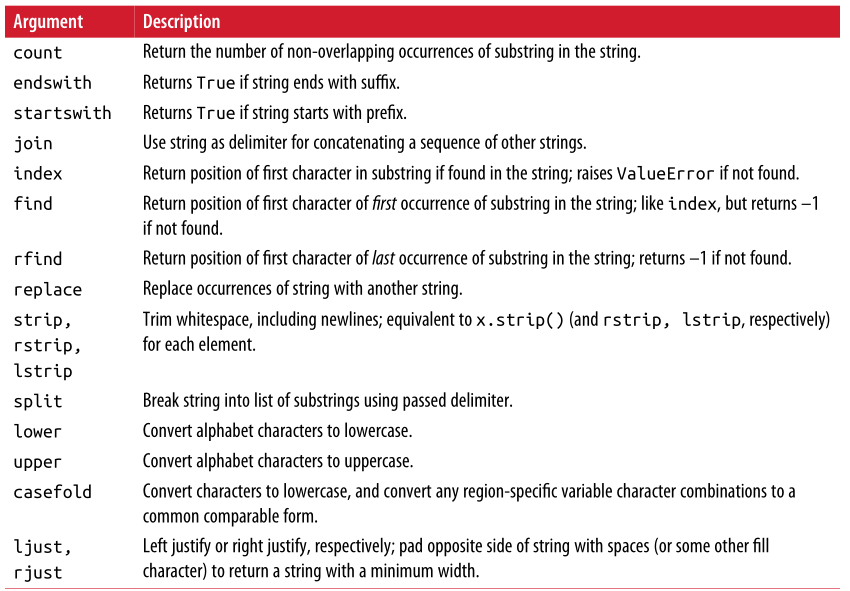

#### Regular Expressions

Regular expressions probide a flexible way to search and match (often more comlex) string pattern in text. Python's built-in module *re* is responsible for applying regular expression to strings.

The *re* module falls into three categories: pattern matching, substitution, and splitting. Naturally these are all related; a regex (short for regular expression) describes a pattern to locate in the text, which can be used for many purposes. Let's look at an example:

Suppose we want to split a string with a varaible number of  whitespaces (tabs, spaces and newlines). The regex describing one or more whitespace characters is *\s+*:

In [210]:
import re

In [211]:
text = 'foo      bar\t  baz \tqux'

In [212]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

>注意：当我们调用*re.split*('\s+', text)时，正则表达式会先编译，然后才会应用*split*()方法到text上。我们也可以先使用*re.compile*()方法编译正则表达式，得到一个可重复使用的regex对象:

In [213]:
regex = re.compile('\s+')

In [214]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

相对应地，如果我们想获得所有匹配到的模式，可以使用*re.findall*()方法：

In [215]:
regex.findall(text)

['      ', '\t  ', ' \t']

Creating a regex object with *re.compile*() method is highly recommended if want to apply the same expression to many strings; doing so will save many CPU cycles.

*match*()和*search*()方法和*findall*()关系较大，*findall*()方法返回一个字符串中所有的匹配，而*search*()只返回到第一个匹配，*match*()只会去匹配一个字符串的开始位置。

Let's consider a block of text and a regular expression capable of identifying most email addresses:

In [216]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""

In [223]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [224]:
# 编译
# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

使用*findall*()方法找出所有的匹配项:

In [225]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

*searc*()返回一个特殊的代表第一个匹配到的邮箱的match对象，该对象告诉我们这个匹配项在字符串的起始和终止位置:

In [226]:
m = regex.search(text)

In [227]:
m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [228]:
text[m.start():m.end()]

'dave@google.com'

In [230]:
print(regex.match(text))

None


*regex.match*() returns None, as it only matches if the pattern occurs at the begining of the string.

Relatedly, *sub*() method will return a new string with occurences of the string replaced by the new string:

In [231]:
print(regex.sub("redacted", text))

Dave redacted
Steve redacted
Rob redacted
Ryan redacted



假设我们想查找邮件地址，同时将邮件分割为三部分：用户名，域名，域名后缀。要做到这一点，我们只需在正则表达式中用圆括号(parenthesis)将这三部分的正则括起来：

In [233]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [237]:
regex = re.compile(pattern, flags=re.IGNORECASE)

A match object produced by this modified regex returns a tuple of the pattern components with its *group*() method:

In [238]:
m = regex.match('tongzi@126.com')

In [239]:
m.groups()

('tongzi', '126', 'com')

While *findall*() returns a list of tuples when the pattern has groups:

In [240]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

*sub*() also has access to groups in each match using special synbols like \1 and \2. The symbol \1 corresponds to the first matched group, \2 corresponds to the second, and so forth:

In [241]:
print(regex.sub(r'User: \1, Domain: \2, Suffix: \3', text))

Dave User: dave, Domain: google, Suffix: com
Steve User: steve, Domain: gmail, Suffix: com
Rob User: rob, Domain: gmail, Suffix: com
Ryan User: ryan, Domain: yahoo, Suffix: com



Table below provides a brief summay:  
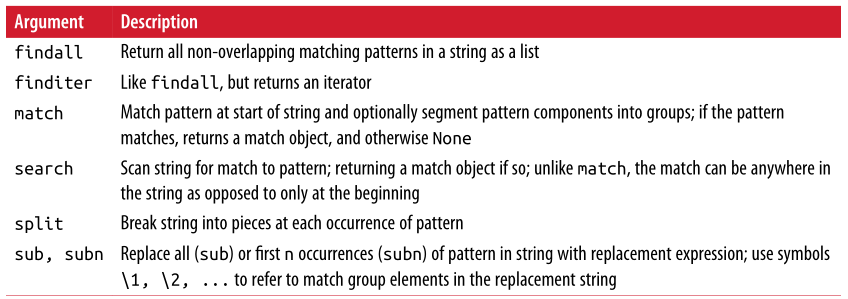

#### Vectorized String Functions in pandas

Cleaning up a messy dataset for analysis often requires a lot of string munging and regularization. To complicate matters, a column containing strings will sometimes have missing data:

In [242]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
.....: 'Rob': 'rob@gmail.com', 'Wes': np.nan}

In [243]:
data = pd.Series(data)

In [244]:
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [245]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

We can apply string and regular expression methods that can be applied (passing a lambda or other function) to each value using *data.map*(), but it will fail on NA values. To code with this, Series has array-oriented methods for string operations that skip NA values. These methods are accessed through Series's *str* attribute. For example, we can check whether each email address has 'gmail' in it with *str.contains*():

In [246]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

Regular expressions can be used, too, along with any *re* options like *re.IGNORECASE*:

In [248]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [249]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

There are a couple of ways to do vectorized element retrieval. Either use *str.get()* or index into the *str* attribute:

In [250]:
matches = data.str.match(pattern, flags=re.IGNORECASE)

In [260]:
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [255]:
data['ceprei'] = 'cepreitest  software@ceprei.biz'

In [256]:
data

Dave                      dave@google.com
Steve                     steve@gmail.com
Rob                         rob@gmail.com
Wes                                   NaN
ceprei    cepreitest  software@ceprei.biz
dtype: object

In [257]:
data.str.match(pattern, flags=re.IGNORECASE)

Dave       True
Steve      True
Rob        True
Wes         NaN
ceprei    False
dtype: object

从上面的例子可以看出，ceprei这一项的第一个元素是cepreitest，所以*data.str.match*()方法匹配失败，返回False。

To access elements in the embedded lists, we can pass an index to either of these functions:

In [258]:
# matches是一个Series对象
matches.str.get(1)

Dave    NaN
Steve   NaN
Rob     NaN
Wes     NaN
dtype: float64

In [261]:
matches.str[0]

Dave    NaN
Steve   NaN
Rob     NaN
Wes     NaN
dtype: float64

In [262]:
data.str[:5]

Dave      dave@
Steve     steve
Rob       rob@g
Wes         NaN
ceprei    cepre
dtype: object

Partial listing of vectorized string methods:  
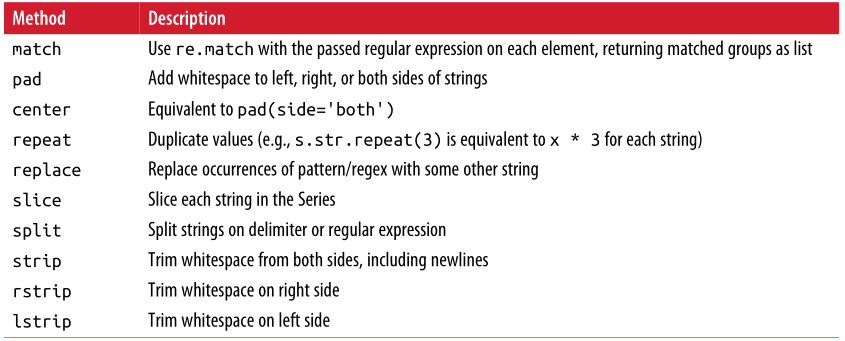  
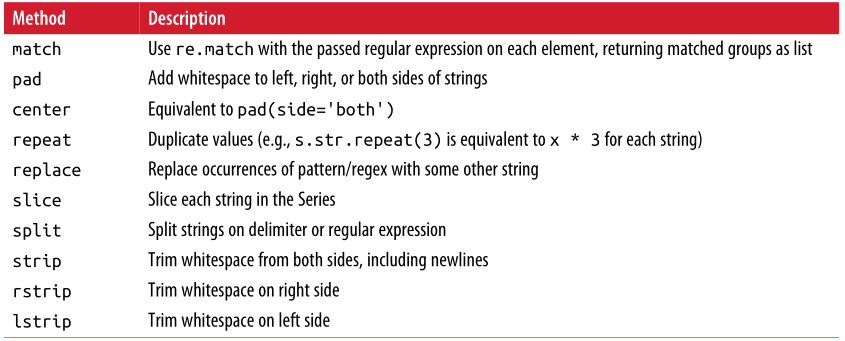

本章完结！！